In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as stests
from matplotlib import rcParams
plt.rcParams['axes.grid'] = False
mpl.rcParams['pdf.fonttype'] = 42
import vcf

Look at the median coverage of each aligned deduplicated bam files. The statistics are generated by the picard.


In [2]:
cov = pd.read_csv("wgs_median_coverage.tsv", sep="\t", comment="#")
cov

,sample,median_coverage
0,10,3349
1,11,3991
2,12,3860
3,13,3723
4,14,3272
5,15,3927
6,16,3791
7,17,3424
8,18,3884
9,19,3654


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


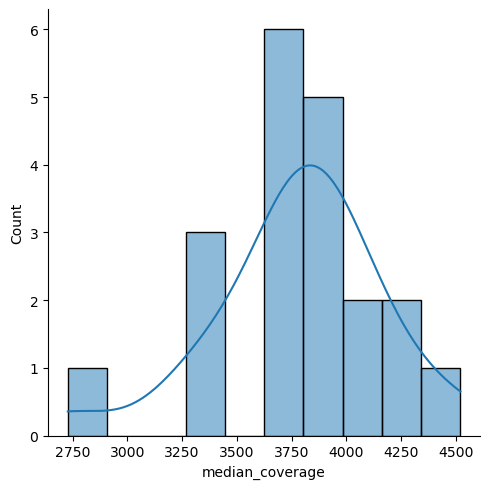

In [23]:
sns.displot(data=cov,
            bins=10,
            x='median_coverage',kde=True,alpha=0.5)
plt.savefig("wgs_median_coverage.pdf")

In [3]:
def parse_vcf(file_path):
    def parse_info_field(info):
        info_dict = {}
        for item in info.split(';'):
            if '=' in item:
                key, value = item.split('=')
                info_dict[key] = value
            else:
                info_dict[item] = True  # For flags without a value
        return info_dict

    def parse_format_field(format_keys, format_values):
        format_dict = {}
        values = format_values.split(':')
        for key, value in zip(format_keys, values):
            format_dict[key] = value
        return format_dict

    data = []

    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue
            parts = line.strip().split('\t')
            chrom, pos, id, ref, alt, qual, filter, info, format, unknown = parts

            info_dict = parse_info_field(info)
            format_dict = parse_format_field(format.split(':'), unknown)

            row = {
                'CHROM': chrom,
                'POS': pos,
                'ID': id,
                'REF': ref,
                'ALT': alt,
                'QUAL': qual,
                'FILTER': filter,
                **info_dict,
                **format_dict
            }
            data.append(row)

    df = pd.DataFrame(data)

    # Convert possible numeric fields, leaving non-convertible values unchanged
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore')

    return df

In [8]:
vcf_1 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/1_S450_L007.dedup.freebayes.raw.vcf")
vcf_2 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/2_S451_L007.dedup.freebayes.raw.vcf")
vcf_3 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/3_S452_L007.dedup.freebayes.raw.vcf")
vcf_4 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/4_S453_L007.dedup.freebayes.raw.vcf")
vcf_5 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/5_S454_L007.dedup.freebayes.raw.vcf")
vcf_6 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/6_S455_L007.dedup.freebayes.raw.vcf")
vcf_7 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/7_S456_L007.dedup.freebayes.raw.vcf")
vcf_8 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/8_S457_L007.dedup.freebayes.raw.vcf")
vcf_9 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/9_S458_L007.dedup.freebayes.raw.vcf")
vcf_10 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/10_S459_L007.dedup.freebayes.raw.vcf")

vcf_11 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/11_S460_L007.dedup.freebayes.raw.vcf")
vcf_12 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/12_S461_L007.dedup.freebayes.raw.vcf")
vcf_13 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/13_S462_L007.dedup.freebayes.raw.vcf")
vcf_14 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/14_S463_L007.dedup.freebayes.raw.vcf")
vcf_15 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/15_S464_L007.dedup.freebayes.raw.vcf")
vcf_16 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/16_S465_L007.dedup.freebayes.raw.vcf")
vcf_17 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/17_S466_L007.dedup.freebayes.raw.vcf")
vcf_18 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/18_S467_L007.dedup.freebayes.raw.vcf")
vcf_19 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/19_S468_L007.dedup.freebayes.raw.vcf")
vcf_20 = parse_vcf("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/gDNA/20_S469_L007.dedup.freebayes.raw.vcf")

In [76]:
vcf_1

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,AB,ABP,AC,...,SAP,SAR,SRF,SRP,SRR,TYPE,GT,AD,GL,ratio
0,NC_007793.1,317,.,A,G,1.174730e+05,.,0,0,1,...,232.22,1359,0,5.18177,1,snp,1,"1,3309","-11787.5,0",0.999698
1,NC_007793.1,5010,.,C,G,1.215880e+05,.,0,0,1,...,11.7095,1650,0,0.00000,0,snp,1,"0,3417","-12168.6,0",1.000000
2,NC_007793.1,12743,.,A,C,0.000000e+00,.,0,0,0,...,695.71,0,405,1109.66000,1351,snp,0,"1756,319","0,-5151.93",0.153735
3,NC_007793.1,12750,.,A,C,0.000000e+00,.,0,0,0,...,320.045,0,755,388.43200,1369,snp,0,"2124,146","0,-6700.84",0.064317
4,NC_007793.1,13778,.,A,C,0.000000e+00,.,0,0,0,...,519.821,0,344,1767.04000,1601,snp,0,"1945,238","0,-6228.23",0.109024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,NC_007793.1,2809970,.,G,T,2.266170e-13,.,0,0,0,...,309.188,0,480,1040.43000,1437,snp,0,"1917,141","0,-6253.36",0.068513
295,NC_007793.1,2846890,.,A,C,2.227600e-13,.,0,0,0,...,467.705,0,297,1263.04000,1242,snp,0,"1539,214","0,-4927.52",0.122076
296,NC_007793.1,2846904,.,A,C,0.000000e+00,.,0,0,0,...,745.654,0,417,713.51200,1128,snp,0,"1545,342","0,-4713.71",0.181240
297,NC_007793.1,2846907,.,T,C,0.000000e+00,.,0,0,0,...,291.816,0,573,458.17200,1179,snp,0,"1752,133","0,-5750.82",0.070557


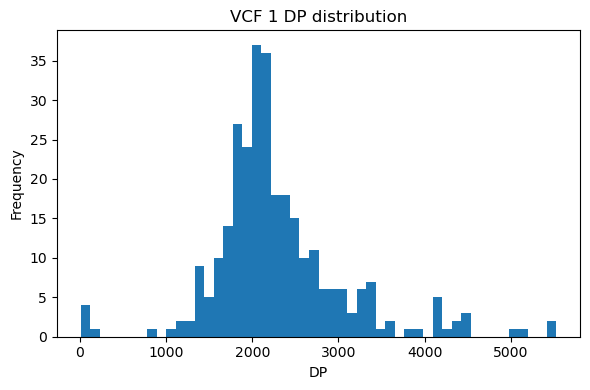

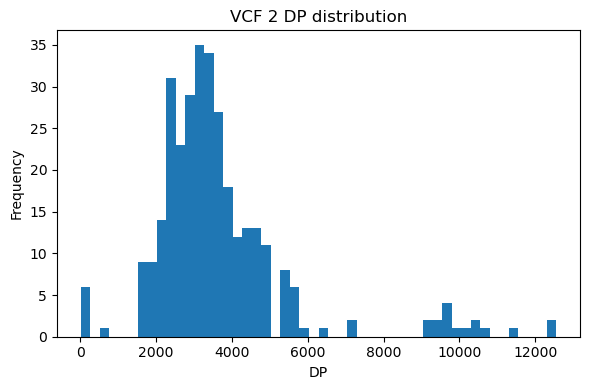

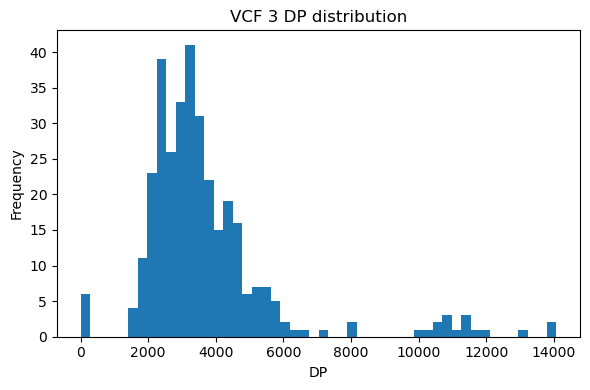

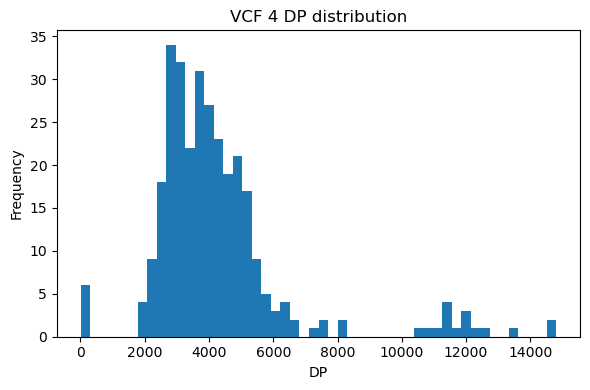

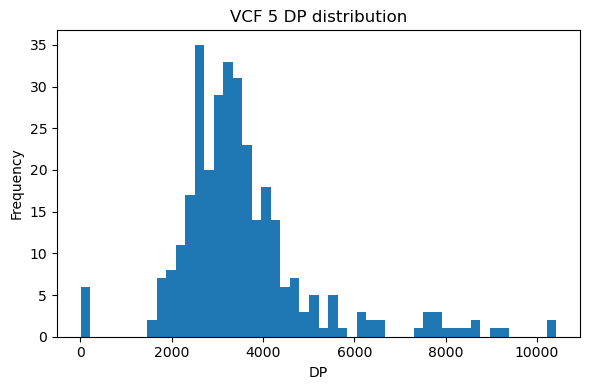

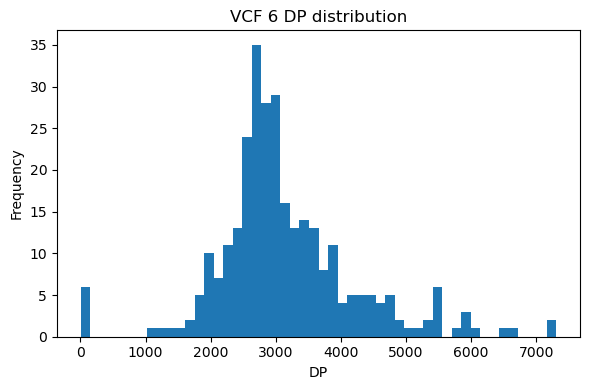

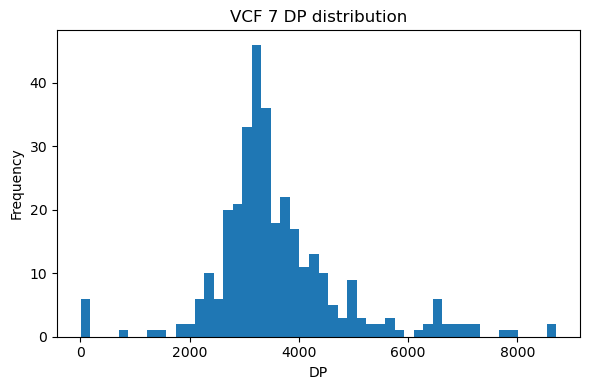

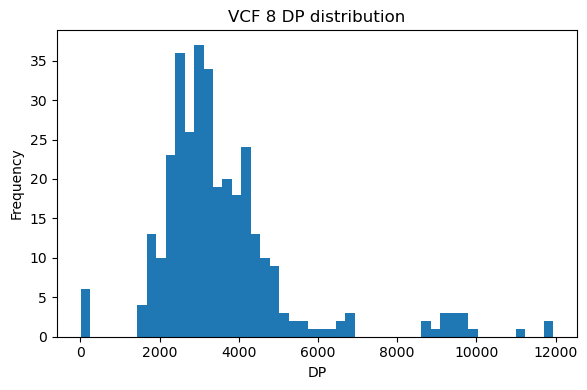

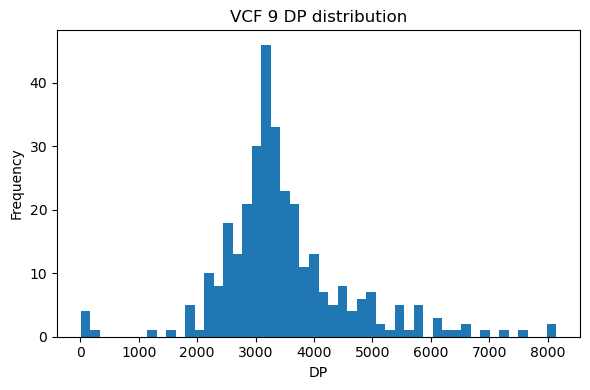

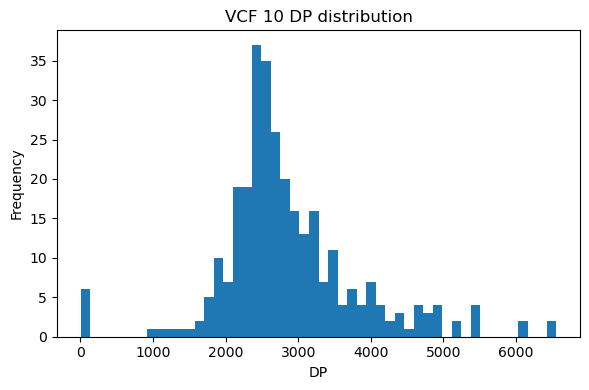

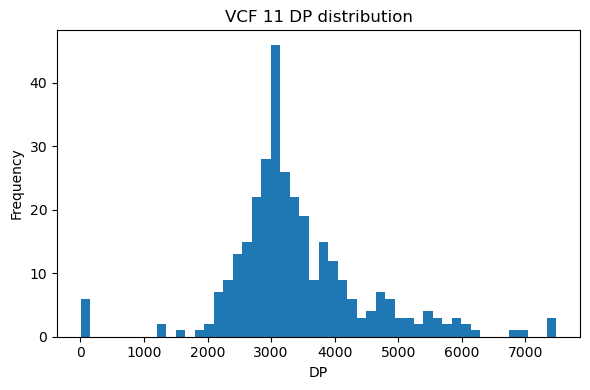

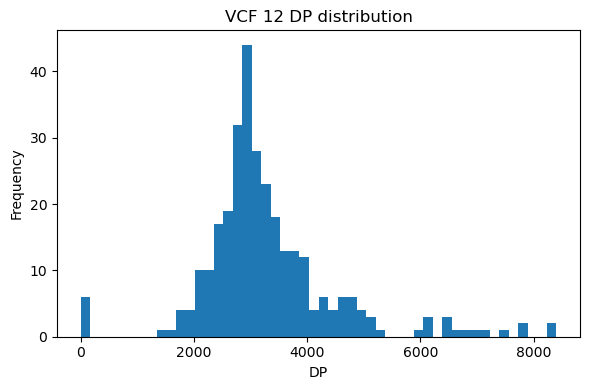

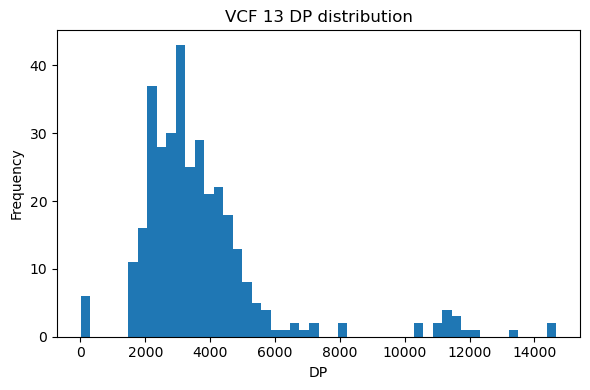

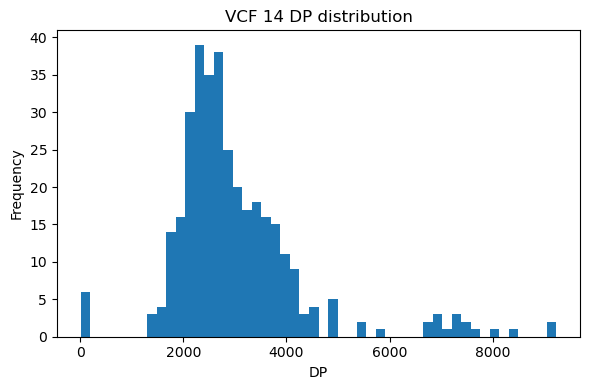

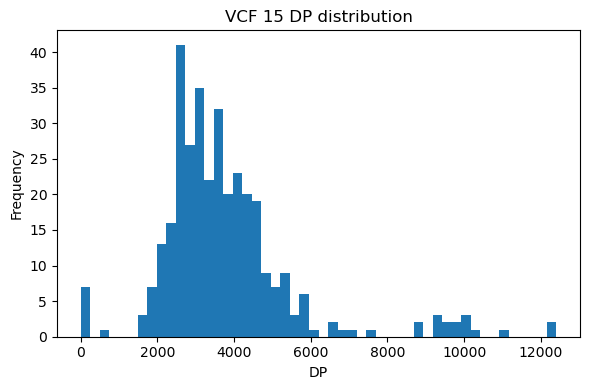

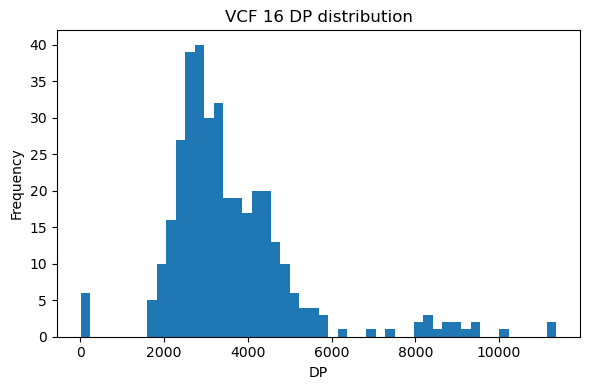

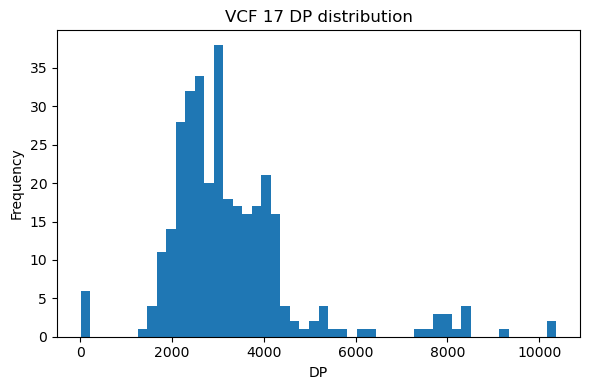

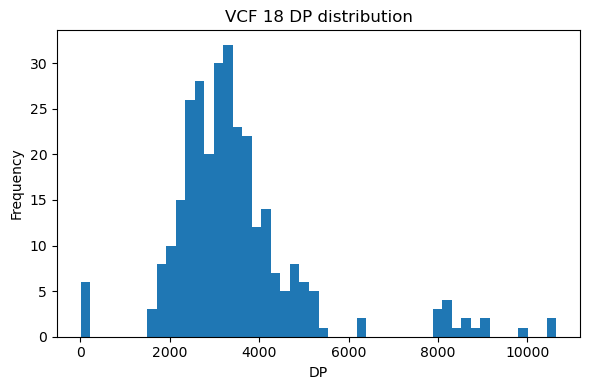

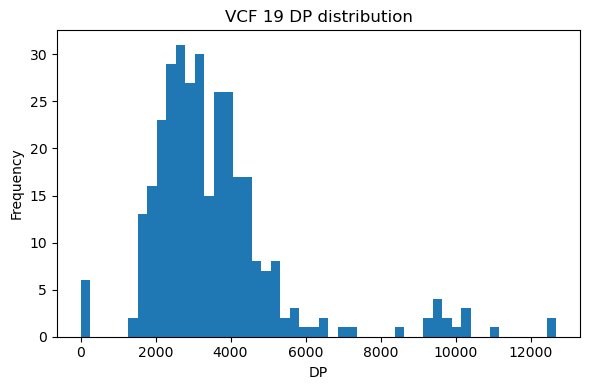

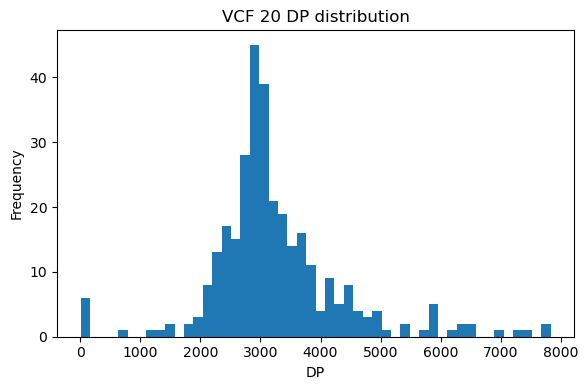

In [17]:
vcf_list = [vcf_1, vcf_2, vcf_3, vcf_4, vcf_5,
            vcf_6, vcf_7, vcf_8, vcf_9, vcf_10,
            vcf_11, vcf_12, vcf_13, vcf_14, vcf_15,
            vcf_16, vcf_17, vcf_18, vcf_19, vcf_20]
for i, df in enumerate(vcf_list, start=1):
    plt.figure(figsize=(6,4))
    df['DP'].hist(bins=50)                 # draw histogram of DP
    plt.title(f'VCF {i} DP distribution')
    plt.grid(False)
    plt.xlabel('DP')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [35]:
for df in vcf_list:
    def to_int(x):
        # convert whatever x is into a string, strip commas, then int
        return int(str(x).replace(',', ''))
    
    df['AO'] = df['AO'].apply(to_int)
    df['RO'] = df['RO'].apply(to_int)
    df['ratio'] = df['AO'] / (df['AO'] + df['RO'])

In [19]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('vcf_DP_histograms.pdf') as pdf:
    for i, df in enumerate(vcf_list, start=1):
        fig, ax = plt.subplots(figsize=(6,4))
        # draw the histogram on the ax
        df['DP'].hist(bins=50, ax=ax)
        ax.set_title(f'VCF {i} DP distribution')
        ax.set_xlabel('DP')
        ax.set_ylabel('Frequency')
        ax.grid(False)
        plt.tight_layout()
        
        # save this figure into the PDF
        pdf.savefig(fig)
        plt.close(fig)

In [75]:
union_set = set()
for df in vcf_list:
    union_set.update(df['POS'])

# 2) Turn it back into a sorted list (or Series/DataFrame)
union_positions = sorted(union_set)
union_df = pd.DataFrame({'POS': union_positions})
union_df

,POS
0,317
1,5010
2,12743
3,12750
4,13778
...,...
471,2846897
472,2846904
473,2846907
474,2858553


In [20]:
len(set(vcf_2['POS']).intersection(set(vcf_3['POS']),set(vcf_4['POS']),set(vcf_5['POS'])))

266

In [21]:
len(set(vcf_6['POS']).intersection(set(vcf_7['POS']),set(vcf_8['POS'])))

261

In [22]:
len(set(vcf_9['POS']).intersection(set(vcf_12['POS']),set(vcf_15['POS']),set(vcf_18['POS'])))

257

In [23]:
len(set(vcf_10['POS']).intersection(set(vcf_13['POS']),set(vcf_16['POS']),set(vcf_19['POS'])))

266

## Evolution A,  07/24/2023
### vcf_12345= 0r,1r,2r,3r,4r,5r

In [48]:
from functools import reduce
vcf_dfs = [vcf_1, vcf_2, vcf_3, vcf_4, vcf_5]

# Step 1: build a list of smaller DataFrames, each with POS/REF/ALT + renamed ratio
small_dfs = []
for i, df in enumerate(vcf_dfs, start=1):
    sub = df[['POS', 'REF', 'ALT', 'RO','AO','ratio']].copy()
    sub = sub.rename(columns={'RO': f'RO_{i}',
                              'AO': f'AO_{i}',
                              'ratio': f'ratio_{i}'})
    small_dfs.append(sub)

# Step 2: merge them all on POS/REF/ALT
merged_A = reduce(
    lambda left, right: pd.merge(left, right, on=['POS','REF','ALT'], how='outer'),
    small_dfs
)
merged_A.fillna(0, inplace=True)
merged_A

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4,RO_5,AO_5,ratio_5
0,317,A,G,1.0,3309.0,0.999698,0.0,5519.0,1.000000,0.0,5368.0,1.000000,0.0,6067.0,1.000000,0.0,5220.0,1.000000
1,5010,C,G,0.0,3417.0,1.000000,0.0,5851.0,1.000000,1.0,5826.0,0.999828,0.0,6529.0,1.000000,0.0,5547.0,1.000000
2,12743,A,C,1756.0,319.0,0.153735,2982.0,576.0,0.161889,2976.0,568.0,0.160271,3512.0,602.0,0.146330,2693.0,526.0,0.163405
3,12750,A,C,2124.0,146.0,0.064317,3564.0,249.0,0.065303,3555.0,243.0,0.063981,4119.0,254.0,0.058084,3162.0,277.0,0.080547
4,13778,A,C,1945.0,238.0,0.109024,3553.0,391.0,0.099138,3467.0,409.0,0.105521,4080.0,434.0,0.096145,3044.0,342.0,0.101004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2301161,T,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,3667.0,223.0,0.057326
400,2605526,ATCTA,"CTCTC,CTCTA",0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2131.0,743162.0,0.997141
401,2621968,T,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,3287.0,183.0,0.052738
402,2809973,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2798.0,287.0,0.093031


In [ ]:
df = merged_A[merged_A['ratio']]

<Axes: >

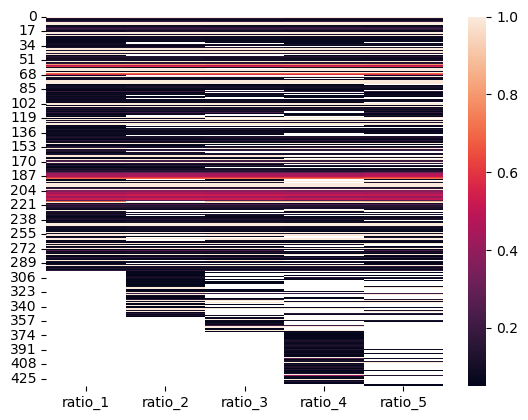

In [ ]:
sns.heatmap(merged_A[['ratio_1','ratio_2','ratio_3','ratio_4','ratio_5']], save='')

In [ ]:
sns.heatmap()

In [52]:
filtered_vcf = merged_A[(merged_A['ratio_5'] >= merged_A['ratio_4']) &
                        (merged_A['ratio_4'] >= merged_A['ratio_3']) &
                        (merged_A['ratio_3'] >= merged_A['ratio_2']) &
                        (merged_A['ratio_2'] >= merged_A['ratio_1']) &
                        (merged_A['ratio_1'] < 0.99)]
filtered_vcf

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4,RO_5,AO_5,ratio_5
329,2088775,T,G,0.0,0.0,0.0,1906.0,112.0,0.0555,1893.0,115.0,0.057271,2163.0,148.0,0.064042,2200.0,153.0,0.065023
332,2178931,C,T,0.0,0.0,0.0,0.0,13.0,1.0000,0.0,7.0,1.000000,0.0,10.0,1.000000,0.0,7.0,1.000000
383,2511755,A,G,0.0,0.0,0.0,0.0,0.0,0.0000,4433.0,263.0,0.056005,5041.0,333.0,0.061965,3791.0,263.0,0.064874
393,1981217,G,T,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,4241.0,245.0,0.054614,3027.0,181.0,0.056421
395,608770,T,G,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,3031.0,221.0,0.067958
396,1151265,T,G,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,2649.0,189.0,0.066596
397,1294120,G,A,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,2126.0,161.0,0.070398
398,1844400,G,A,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,3965.0,215.0,0.051435
399,2301161,T,G,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,3667.0,223.0,0.057326
400,2605526,ATCTA,"CTCTC,CTCTA",0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,2131.0,743162.0,0.997141


POS=2088775, 2178931, 2511755, 1981217	look interesting

In [65]:
from functools import reduce
vcf_dfs = [vcf_1, vcf_6, vcf_7, vcf_8]

# Step 1: build a list of smaller DataFrames, each with POS/REF/ALT + renamed ratio
small_dfs = []
for i, df in enumerate(vcf_dfs, start=1):
    sub = df[['POS', 'REF', 'ALT', 'RO','AO','ratio']].copy()
    sub = sub.rename(columns={'RO': f'RO_{i}',
                              'AO': f'AO_{i}',
                              'ratio': f'ratio_{i}'})
    small_dfs.append(sub)

# Step 2: merge them all on POS/REF/ALT
merged_B = reduce(
    lambda left, right: pd.merge(left, right, on=['POS','REF','ALT'], how='outer'),
    small_dfs
)
merged_B.fillna(0, inplace=True)
merged_B

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4
0,317,A,G,1.0,3309.0,0.999698,2.0,4635.0,0.999569,0.0,4819.0,1.000000,0.0,5328.0,1.000000
1,5010,C,G,0.0,3417.0,1.000000,0.0,4867.0,1.000000,0.0,5119.0,1.000000,2.0,5615.0,0.999644
2,12743,A,C,1756.0,319.0,0.153735,2430.0,447.0,0.155370,2535.0,573.0,0.184363,3028.0,489.0,0.139039
3,12750,A,C,2124.0,146.0,0.064317,2885.0,191.0,0.062094,3018.0,260.0,0.079317,3595.0,241.0,0.062826
4,13778,A,C,1945.0,238.0,0.109024,2773.0,283.0,0.092605,2885.0,337.0,0.104593,3335.0,357.0,0.096696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2628180,A,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,5247.0,303.0,0.054595
428,2674397,A,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,5955.0,763.0,0.113575
429,2705691,A,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2943.0,210.0,0.066603
430,2748787,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2095.0,386.0,0.155582


In [66]:
filtered_vcf = merged_B[(merged_B['ratio_4'] >= merged_B['ratio_3']) &
                        (merged_B['ratio_3'] >= merged_B['ratio_2']) &
                        (merged_B['ratio_2'] >= merged_B['ratio_1']) &
                        (merged_B['ratio_1'] < 0.99)]
filtered_vcf

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4
23,273553,A,C,1817.0,153.0,0.077665,2517.0,226.0,0.082392,2691.0,289.0,0.096980,2634.0,294.0,0.100410
66,556291,T,C,739.0,1634.0,0.688580,931.0,2082.0,0.691006,1058.0,2535.0,0.705539,1482.0,3577.0,0.707057
140,1454838,T,G,1567.0,200.0,0.113186,2143.0,282.0,0.116289,2508.0,339.0,0.119073,2059.0,298.0,0.126432
144,1474587,G,T,1167.0,76.0,0.061142,1542.0,103.0,0.062614,1783.0,120.0,0.063058,1633.0,112.0,0.064183
182,1857109,A,G,2251.0,824.0,0.267967,3154.0,1173.0,0.271089,4217.0,1658.0,0.282213,3062.0,1217.0,0.284412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2628180,A,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,5247.0,303.0,0.054595
428,2674397,A,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,5955.0,763.0,0.113575
429,2705691,A,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2943.0,210.0,0.066603
430,2748787,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2095.0,386.0,0.155582


In [54]:
from functools import reduce
vcf_dfs = [vcf_1, vcf_9, vcf_12, vcf_15, vcf_18]

# Step 1: build a list of smaller DataFrames, each with POS/REF/ALT + renamed ratio
small_dfs = []
for i, df in enumerate(vcf_dfs, start=1):
    sub = df[['POS', 'REF', 'ALT', 'RO','AO','ratio']].copy()
    sub = sub.rename(columns={'RO': f'RO_{i}',
                              'AO': f'AO_{i}',
                              'ratio': f'ratio_{i}'})
    small_dfs.append(sub)

# Step 2: merge them all on POS/REF/ALT
merged_C1 = reduce(
    lambda left, right: pd.merge(left, right, on=['POS','REF','ALT'], how='outer'),
    small_dfs
)
merged_C1.fillna(0, inplace=True)
merged_C1

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4,RO_5,AO_5,ratio_5
0,317,A,G,1.0,3309.0,0.999698,0.0,4809.0,1.000000,1.0,4876.0,0.999795,0.0,5219.0,1.000000,0.0,4961.0,1.000000
1,5010,C,G,0.0,3417.0,1.000000,0.0,5029.0,1.000000,0.0,4694.0,1.000000,0.0,5409.0,1.000000,0.0,5182.0,1.000000
2,12743,A,C,1756.0,319.0,0.153735,2500.0,490.0,0.163880,2433.0,501.0,0.170757,2923.0,473.0,0.139282,2672.0,470.0,0.149586
3,12750,A,C,2124.0,146.0,0.064317,2944.0,200.0,0.063613,2906.0,218.0,0.069782,3446.0,233.0,0.063332,3163.0,194.0,0.057790
4,13778,A,C,1945.0,238.0,0.109024,2955.0,331.0,0.100730,2720.0,269.0,0.089997,3388.0,335.0,0.089981,2955.0,285.0,0.087963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2780643,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,5571.0,315.0,0.053517,0.0,0.0,0.000000
430,2835831,G,T,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,3947.0,267.0,0.063360,0.0,0.0,0.000000
431,273557,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2691.0,230.0,0.078740
432,731813,T,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2472.0,143.0,0.054685


In [55]:
filtered_vcf = merged_C1[(merged_C1['ratio_5'] >= merged_C1['ratio_4']) &
                        (merged_C1['ratio_4'] >= merged_C1['ratio_3']) &
                        (merged_C1['ratio_3'] >= merged_C1['ratio_2']) &
                        (merged_C1['ratio_2'] >= merged_C1['ratio_1']) &
                        (merged_C1['ratio_1'] < 0.99)]
filtered_vcf

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4,RO_5,AO_5,ratio_5
186,1857201,TG,CA,1812.0,1427.0,0.440568,3038.0,2479.0,0.449338,2673.0,2199.0,0.451355,2821.0,2325.0,0.451807,2528.0,2404.0,0.487429
221,2016007,A,C,1331.0,203.0,0.132334,2121.0,339.0,0.137805,1966.0,322.0,0.140734,2472.0,411.0,0.142560,2051.0,343.0,0.143275
335,2178931,C,T,0.0,0.0,0.000000,0.0,8.0,1.000000,0.0,5.0,1.000000,0.0,12.0,1.000000,0.0,7.0,1.000000
356,688558,GTGATGATGAT,GTGATGATGATGAT,0.0,0.0,0.000000,0.0,0.0,0.000000,4067.0,285.0,0.065487,3790.0,448.0,0.105710,4156.0,568.0,0.120237
357,689161,GTTTTTTCA,GTTTTTTTCA,0.0,0.0,0.000000,0.0,0.0,0.000000,3244.0,898.0,0.216803,2676.0,1367.0,0.338115,2767.0,1851.0,0.400823
405,1598997,C,T,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2426.0,304.0,0.111355,2347.0,334.0,0.124580
406,1598998,TGTAAAT,"GGGAAAG,TGGAAAG",0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2050.0,184427.0,0.989007,2025.0,205443.0,0.990239
415,1995031,T,A,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2111.0,112.0,0.050382,1843.0,107.0,0.054872
431,273557,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2691.0,230.0,0.078740
432,731813,T,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2472.0,143.0,0.054685


In [56]:
from functools import reduce
vcf_dfs = [vcf_1, vcf_10, vcf_13, vcf_16, vcf_19]

# Step 1: build a list of smaller DataFrames, each with POS/REF/ALT + renamed ratio
small_dfs = []
for i, df in enumerate(vcf_dfs, start=1):
    sub = df[['POS', 'REF', 'ALT', 'RO','AO','ratio']].copy()
    sub = sub.rename(columns={'RO': f'RO_{i}',
                              'AO': f'AO_{i}',
                              'ratio': f'ratio_{i}'})
    small_dfs.append(sub)

# Step 2: merge them all on POS/REF/ALT
merged_C2 = reduce(
    lambda left, right: pd.merge(left, right, on=['POS','REF','ALT'], how='outer'),
    small_dfs
)
merged_C2.fillna(0, inplace=True)
merged_C2

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4,RO_5,AO_5,ratio_5
0,317,A,G,1.0,3309.0,0.999698,2.0,3977.0,0.999497,1.0,5230.0,0.999809,0.0,4638.0,1.000000,0.0,5199.0,1.000000
1,5010,C,G,0.0,3417.0,1.000000,0.0,4017.0,1.000000,0.0,5599.0,1.000000,0.0,4665.0,1.000000,0.0,5591.0,1.000000
2,12743,A,C,1756.0,319.0,0.153735,2043.0,361.0,0.150166,2935.0,519.0,0.150261,2505.0,458.0,0.154573,2959.0,498.0,0.144056
3,12750,A,C,2124.0,146.0,0.064317,2451.0,169.0,0.064504,3486.0,260.0,0.069407,2981.0,196.0,0.061693,3502.0,226.0,0.060622
4,13778,A,C,1945.0,238.0,0.109024,2323.0,275.0,0.105851,3373.0,353.0,0.094740,2936.0,314.0,0.096615,3295.0,350.0,0.096022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,273557,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2478.0,224.0,0.082902
429,723574,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1745.0,155.0,0.081579
430,723577,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1772.0,125.0,0.065894
431,991617,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1661.0,88.0,0.050314


In [57]:
filtered_vcf = merged_C2[(merged_C2['ratio_5'] >= merged_C2['ratio_4']) &
                        (merged_C2['ratio_4'] >= merged_C2['ratio_3']) &
                        (merged_C2['ratio_3'] >= merged_C2['ratio_2']) &
                        (merged_C2['ratio_2'] >= merged_C2['ratio_1']) &
                        (merged_C2['ratio_1'] < 0.99)]
filtered_vcf

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4,RO_5,AO_5,ratio_5
85,731828,T,G,2078.0,125.0,0.056741,2597.0,158.0,0.057350,2213.0,144.0,0.061095,2721.0,179.0,0.061724,2143.0,153.0,0.066638
319,1598997,C,T,0.0,0.0,0.000000,2362.0,319.0,0.118985,2015.0,277.0,0.120855,2368.0,338.0,0.124908,1929.0,322.0,0.143048
322,1995031,T,A,0.0,0.0,0.000000,1191.0,63.0,0.050239,2298.0,122.0,0.050413,1976.0,107.0,0.051368,2127.0,122.0,0.054246
326,2178931,C,T,0.0,0.0,0.000000,0.0,5.0,1.000000,0.0,11.0,1.000000,0.0,9.0,1.000000,0.0,7.0,1.000000
337,61745,GC,AT,0.0,0.0,0.000000,0.0,0.0,0.000000,3763.0,258.0,0.064163,4115.0,297.0,0.067316,3551.0,271.0,0.070905
360,688558,GTGATGATGAT,GTGATGATGATGAT,0.0,0.0,0.000000,0.0,0.0,0.000000,3919.0,355.0,0.083060,3743.0,484.0,0.114502,3462.0,491.0,0.124209
361,689161,GTTTTTTCA,GTTTTTTTCA,0.0,0.0,0.000000,0.0,0.0,0.000000,3355.0,1098.0,0.246575,2642.0,1378.0,0.342786,2483.0,1449.0,0.368515
421,2511751,A,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,3582.0,410.0,0.102705,3723.0,540.0,0.126671
422,2511752,ATC,"GTT,GTC",0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,3249.0,406405.0,0.992069,3364.0,492499.0,0.993216
428,273557,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2478.0,224.0,0.082902


In [58]:
from functools import reduce
vcf_dfs = [vcf_1, vcf_11, vcf_14, vcf_17, vcf_20]

# Step 1: build a list of smaller DataFrames, each with POS/REF/ALT + renamed ratio
small_dfs = []
for i, df in enumerate(vcf_dfs, start=1):
    sub = df[['POS', 'REF', 'ALT', 'RO','AO','ratio']].copy()
    sub = sub.rename(columns={'RO': f'RO_{i}',
                              'AO': f'AO_{i}',
                              'ratio': f'ratio_{i}'})
    small_dfs.append(sub)

# Step 2: merge them all on POS/REF/ALT
merged_C3 = reduce(
    lambda left, right: pd.merge(left, right, on=['POS','REF','ALT'], how='outer'),
    small_dfs
)
merged_C3.fillna(0, inplace=True)
merged_C3

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4,RO_5,AO_5,ratio_5
0,317,A,G,1.0,3309.0,0.999698,0.0,4678.0,1.000000,1.0,3988.0,0.999749,1.0,4332.0,0.999769,0.0,4292.0,1.000000
1,5010,C,G,0.0,3417.0,1.000000,0.0,4735.0,1.000000,0.0,3998.0,1.000000,0.0,4345.0,1.000000,0.0,4418.0,1.000000
2,12743,A,C,1756.0,319.0,0.153735,2367.0,472.0,0.166256,2051.0,399.0,0.162857,2366.0,410.0,0.147695,2244.0,441.0,0.164246
3,12750,A,C,2124.0,146.0,0.064317,2805.0,243.0,0.079724,2444.0,179.0,0.068242,2817.0,180.0,0.060060,2681.0,220.0,0.075836
4,13778,A,C,1945.0,238.0,0.109024,2794.0,305.0,0.098419,2450.0,250.0,0.092593,2682.0,256.0,0.087134,2655.0,310.0,0.104553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,1995031,T,A,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1335.0,83.0,0.058533
440,2101843,A,C,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2991.0,163.0,0.051680
441,2211381,A,G,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2788.0,216.0,0.071904
442,2511752,ATCA,"GTTA,GTTG,GTCA",0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2840.0,261218254.0,0.999989


In [59]:
filtered_vcf = merged_C3[(merged_C3['ratio_5'] >= merged_C3['ratio_4']) &
                        (merged_C3['ratio_4'] >= merged_C3['ratio_3']) &
                        (merged_C3['ratio_3'] >= merged_C3['ratio_2']) &
                        (merged_C3['ratio_2'] >= merged_C3['ratio_1']) &
                        (merged_C3['ratio_1'] < 0.99)]
filtered_vcf

,POS,REF,ALT,RO_1,AO_1,ratio_1,RO_2,AO_2,ratio_2,RO_3,AO_3,ratio_3,RO_4,AO_4,ratio_4,RO_5,AO_5,ratio_5
403,474432,G,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2597.0,165.0,0.059739,2784.0,200.0,0.067024
405,688558,GTGATGATGAT,GTGATGATGATGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3501.0,355.0,0.092064,3702.0,460.0,0.110524
406,689161,GTTTTTTCA,GTTTTTTTCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2723.0,1087.0,0.285302,2513.0,1510.0,0.375342
428,52604,A,G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,744.0,41.0,0.052229
429,306048,A,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3396.0,247.0,0.067801
430,372066,T,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3517.0,222.0,0.059374
431,435837,A,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2991.0,219.0,0.068224
432,435838,TTTA,TTTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2700.0,477.0,0.150142
433,435860,TA,TC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2624.0,198.0,0.070163
434,1440943,C,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2363.0,147.0,0.058566


The current code can't handle multiple alternative allels